# _*Exploratory-Data-Analysis-Year-2017*_ 

---
## _*1) Analise das Licitacoes - Ano 2017 - item.csv*_ 

---

---
###  _*Carregamento e identificação dos dados*_ 
 _*Na presente etapa os dados são carregados em formato DataFrame.*_ 

 _*Com isso, uma análise inicial de formato e tipo de variáveis é conduzido.*_ 

---

In [1]:
#Importanto as bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Carregabdo o dataset "licitacao.csv" 
df_item = pd.read_csv('item.csv')

#Visualizando as primeiras colunas
df_item.head()

/Users/viniciuspacheci/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,CD_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_LOTE,NR_ITEM,NR_ITEM_ORIGINAL,DS_ITEM,QT_ITENS,SG_UNIDADE_MEDIDA,...,TP_ORCAMENTO,CD_TIPO_FAMILIA,CD_TIPO_SUBFAMILIA,TP_DOCUMENTO,NR_DOCUMENTO,TP_DOCUMENTO.1,NR_DOCUMENTO.1,TP_BENEFICIO_MICRO_EPP,PC_TX_ESTIMADA,PC_TX_HOMOLOGADA
0,77200,18.0,2017,PRP,1,1,1,óleo diesel comum,104755.0,L,...,NaN,757.0,588.0,J,7016855000150,NaN,NaN,T,NaN,NaN
1,77200,18.0,2017,PRP,1,2,2,gasolina comum,25135.0,L,...,NaN,757.0,588.0,J,7016855000150,NaN,NaN,T,NaN,NaN
2,77200,18.0,2017,PRP,1,3,3,óleo diesel S10,31000.0,L,...,NaN,757.0,588.0,J,7016855000150,NaN,NaN,T,NaN,NaN
3,77200,8.0,2017,PRE,1,29,29,Recapagem de Pneu 1000x20 liso,10.0,UN,...,NaN,745.0,632.0,J,3562696000138,NaN,NaN,T,NaN,NaN
4,77200,8.0,2017,PRE,1,30,30,"Recapagem de Pneu 1000x20 borrachudo, profundi...",10.0,UN,...,NaN,745.0,632.0,J,3562696000138,NaN,NaN,T,NaN,NaN


In [3]:
#Formato do dataset
print('Dataset shape is: {}' .format(df_item.shape))

Dataset shape is: (902710, 32)


In [4]:
#Visualizando as informacoes e tipos de variaveis existentes
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902710 entries, 0 to 902709
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   CD_ORGAO                        902710 non-null  int64  
 1   NR_LICITACAO                    902710 non-null  float64
 2   ANO_LICITACAO                   902710 non-null  int64  
 3   CD_TIPO_MODALIDADE              902710 non-null  object 
 4   NR_LOTE                         902710 non-null  int64  
 5   NR_ITEM                         902710 non-null  int64  
 6   NR_ITEM_ORIGINAL                902710 non-null  object 
 7   DS_ITEM                         902710 non-null  object 
 8   QT_ITENS                        902710 non-null  float64
 9   SG_UNIDADE_MEDIDA               902710 non-null  object 
 10  VL_UNITARIO_ESTIMADO            887647 non-null  float64
 11  VL_TOTAL_ESTIMADO               887647 non-null  float64
 12  DT_REF_VALOR_EST

---
###  _*O objetivo nessa seção é trabalhar com as variáveis objetivo e formação de um dataset de análise. Com isso, fazendo limpezas iniciais no conjunto de dados como remoçao de dados NaN e dados faltantes (NaN).*_ 

 _*Trabalhando com colunas de interesse ou "target":*_ 

 a) CD_ORGAO; 
 
 b) DS_ITEM; 
  
 c) VL_UNITARIO_HOMOLOGADO. 
 
---

In [5]:
#Reorganizando o dataset para o alvo da pesquisa
#Criando um novo dataset, buscando manter a originalidade do primeiro
df_analise = df_item[['CD_ORGAO', 'DS_ITEM', 'VL_UNITARIO_HOMOLOGADO']]
df_analise

,CD_ORGAO,DS_ITEM,VL_UNITARIO_HOMOLOGADO
0,77200,óleo diesel comum,3.2300
1,77200,gasolina comum,4.2990
2,77200,óleo diesel S10,3.3390
3,77200,Recapagem de Pneu 1000x20 liso,543.0000
4,77200,"Recapagem de Pneu 1000x20 borrachudo, profundi...",583.0000
...,...,...,...
902705,78200,budesonida 50mcg spray nasal com 60 doses,10.4000
902706,78200,medroxiprogesterona (acetato) 150 mg,13.2600
902707,78200,captopril 25mg,0.0130
902708,78200,"ciprofloxacino 500mg comprimido fracionável, e...",0.4000


In [6]:
#Eliminacao de valor NaN na coluna VL_LICITACAO
df_analise = df_analise[df_analise['VL_UNITARIO_HOMOLOGADO'].notna()]

#Formato do novo dataset sem NaN 
print('Dataset shape is: {}' .format(df_analise.shape))

Dataset shape is: (741926, 3)


In [7]:
#Removendo valores iguais a zero
#Justificativa: Elementos com zero nao influenciam
#no resultado da analise
df_analise = df_analise[(df_analise != 0).all(1)]

#Formato do novo dataset sem zeros
print('Dataset shape is: {}' .format(df_analise.shape))

Dataset shape is: (701454, 3)


In [8]:
#Removendo valores negativos
df_analise = df_analise[(df_analise['VL_UNITARIO_HOMOLOGADO'] > 0)]

#Formato do novo dataset sem zeros
print('Dataset shape is: {}' .format(df_analise.shape))

Dataset shape is: (701451, 3)


---
###  _*Trabalhando com cos dados numéricos e agrupamento de itens por órgão.*_ 
  _*Nesta seção, decidiu-se trabalhar e agrupar os dados numéricos para identificação de órgãos com maior incidência no valor unitário homologado (VL_UNITARIO_HOMOLOGADO). A ideia é justamente identificar os principais órgãos, em termos quantitativos.*_ 

  a) Separar os dados numéricos oriundos da coluna "VL_UNITARIO_HOMOLOGADO" 
 
  b) Agrupar os dados com base na coluna "CD_ORGAO". 
 
  c) Identificar o órgao em relação ao item. Tal fator pode diferir da ideia anterior com as licitacoes, pois o item nao necessariamente terá o valor acumulado mais elevado. 
  
---

/Users/viniciuspacheci/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


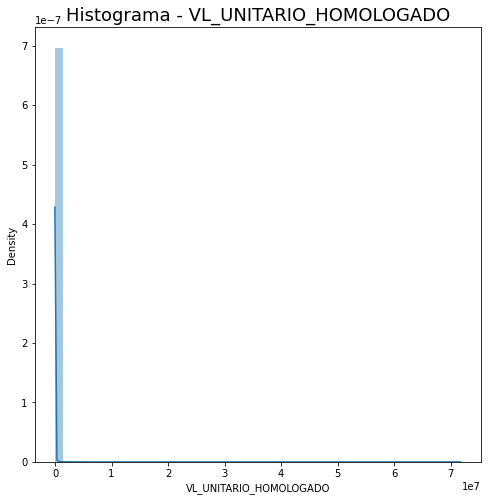

In [9]:
#Avaliando a distribuição da Variável numérica de interesse
plt.figure(figsize = (8, 8))
sns.distplot(df_analise['VL_UNITARIO_HOMOLOGADO'])
plt.title("Histograma - VL_UNITARIO_HOMOLOGADO", size = 18)
plt.savefig('Boxplot-VL_UNITARIO_HOMOLOGADO.png', dpi = 300)

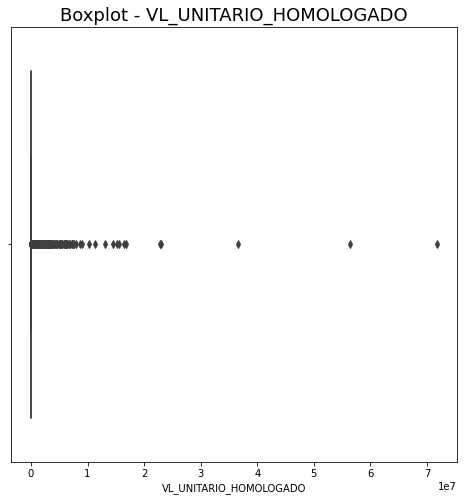

In [10]:
#Observacao da distribuicao estatística
plt.figure(figsize = (8, 8))
sns.boxplot(x = df_analise['VL_UNITARIO_HOMOLOGADO'])
plt.title("Boxplot - VL_UNITARIO_HOMOLOGADO", size = 18)
plt.savefig('Boxplot-VL_UNITARIO_HOMOLOGADO.png', dpi = 300)
#Observa-se de fato uma nao linearidade quanto a termos de valores unitários

In [11]:
#Descricao das principais estatísticas do conjunt
stats = df_analise['VL_UNITARIO_HOMOLOGADO'].describe()
stats

count    7.014510e+05
mean     2.471789e+03
std      1.440406e+05
min      1.000000e-04
25%      2.550000e+00
50%      9.800000e+00
75%      6.232500e+01
max      7.174212e+07
Name: VL_UNITARIO_HOMOLOGADO, dtype: float64

In [12]:
#Agrupando as colunas no formado multiindex, com base na variável target: VL_UNITARIO_HOMOLOGADO
#Criando df para tal finalidade
df_analise_grouped = df_analise.groupby('CD_ORGAO').agg({'VL_UNITARIO_HOMOLOGADO': ['mean',
                                                                         'min', 'max']})
df_analise_grouped

VL_UNITARIO_HOMOLOGADO                         
                           mean        min           max
CD_ORGAO                                                
200                34873.390136      4.950  6.042809e+05
300                73780.972609      0.010  5.634062e+07
900                13651.380667      0.600  6.600000e+05
1005               42261.317857      2.370  3.100000e+05
1400               35916.666667    250.000  1.000000e+05
...                         ...        ...           ...
88358               6540.000000    550.000  2.750000e+04
88361                276.105502      1.682  1.900000e+04
88367               6932.681818   1000.000  2.500000e+04
88370               9947.926169      0.020  9.000000e+05
88394             164722.857143  42000.000  6.979900e+05

[805 rows x 3 columns]

In [13]:
#Renomeando as colunas, para nao trabalhar com multiindex

#Renomeando as colunas
df_analise_grouped.columns = ['VL_UNITARIO_HOMOLOGADO-mean', 'VL_UNITARIO_HOMOLOGADO-min', 'VL_UNITARIO_HOMOLOGADO-max']

#Resetando o index
df_analise_grouped = df_analise_grouped.reset_index()
df_analise_grouped

,CD_ORGAO,VL_UNITARIO_HOMOLOGADO-mean,VL_UNITARIO_HOMOLOGADO-min,VL_UNITARIO_HOMOLOGADO-max
0,200,34873.390136,4.950,6.042809e+05
1,300,73780.972609,0.010,5.634062e+07
2,900,13651.380667,0.600,6.600000e+05
3,1005,42261.317857,2.370,3.100000e+05
4,1400,35916.666667,250.000,1.000000e+05
...,...,...,...,...
800,88358,6540.000000,550.000,2.750000e+04
801,88361,276.105502,1.682,1.900000e+04
802,88367,6932.681818,1000.000,2.500000e+04
803,88370,9947.926169,0.020,9.000000e+05


In [14]:
#Reordenando o Dataframe em ordem decrescente
df_analise_grouped = df_analise_grouped.sort_values('VL_UNITARIO_HOMOLOGADO-max',
                                                   ascending = False)
df_analise_grouped

,CD_ORGAO,VL_UNITARIO_HOMOLOGADO-mean,VL_UNITARIO_HOMOLOGADO-min,VL_UNITARIO_HOMOLOGADO-max
262,54405,352659.750576,0.09,71742116.84
1,300,73780.972609,0.01,56340620.72
13,8700,139522.556279,0.06,36618010.00
15,8900,461489.973976,0.24,23045770.00
6,4000,323933.050940,2.60,22783000.00
...,...,...,...,...
425,64301,4.810000,4.81,4.81
190,50501,4.440000,4.44,4.44
34,41201,3.950000,3.95,3.95
295,56101,1.995000,1.50,2.49


In [15]:
#Identificando os 5 principais órgaos pela funcao head()
df_analise_grouped_5 = df_analise_grouped.head()
df_analise_grouped_5

,CD_ORGAO,VL_UNITARIO_HOMOLOGADO-mean,VL_UNITARIO_HOMOLOGADO-min,VL_UNITARIO_HOMOLOGADO-max
262,54405,352659.750576,0.09,71742116.84
1,300,73780.972609,0.01,56340620.72
13,8700,139522.556279,0.06,36618010.00
15,8900,461489.973976,0.24,23045770.00
6,4000,323933.050940,2.60,22783000.00


In [16]:
#Verificar o órgao relacionado ao código, para isso
#carregamento do dataframe licitacoes
df_licitacao = pd.read_csv('licitacao.csv')

#Execucoes comentadas por motivo de organizacao do código
#df_licitacao[df_licitacao['CD_ORGAO'] == 54405] --> SER. SANEAMENTO PELOTAS
#df_licitacao[df_licitacao['CD_ORGAO'] == 300] --> TRIBUNAL DE JUSTIÇA
#df_licitacao[df_licitacao['CD_ORGAO'] == 8700] --> CIA. RIO GRANDENSE DE SANEAMENTO
#df_licitacao[df_licitacao['CD_ORGAO'] == 8900] --> CIA. PROCESSAMENTO DE DADOS DO RS
#df_licitacao[df_licitacao['CD_ORGAO'] == 4000] --> BANCO REGIONAL DE DESENVOLVIMENTO

/Users/viniciuspacheci/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (52,54) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<IPython.core.display.Javascript object>


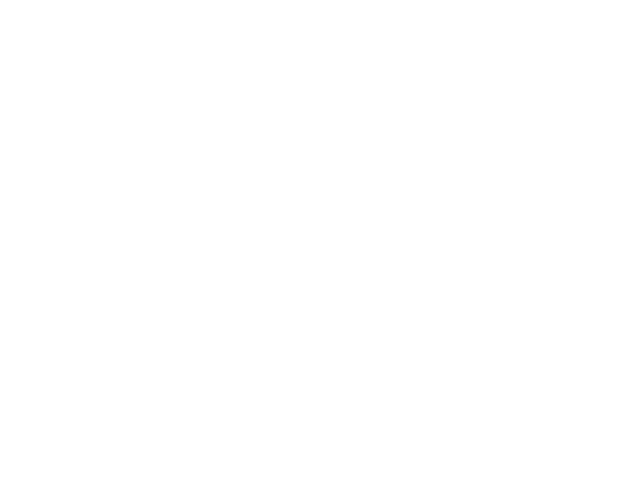

In [17]:
#Criando um Plot de visualizacao com o valor maximo
#Justificativa: objetivo de estudo
%matplotlib notebook
labels = ['SAN. PELOTAS', 'TRI. JUST', 'CIA. SANEAMENTO', 'CIA. PROC. DE DADOS', 'BANCO DESEN.']
x = np.arange(len(labels))  
width = 0.25 
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_analise_grouped_5['VL_UNITARIO_HOMOLOGADO-max'], 
                width, label = 'VL_UNITARIO_HOMOLOGADO-max', color = 'turquoise')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis = 'both', which = 'major', labelsize = 6)
ax.set_ylabel('VL_UNITARIO_HOMOLOGADO-mean')
ax.legend()
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
fig.tight_layout()
plt.show()
plt.savefig('VL_UNITARIO_HOMOLOGADO-max.png', dpi = 300)

<IPython.core.display.Javascript object>


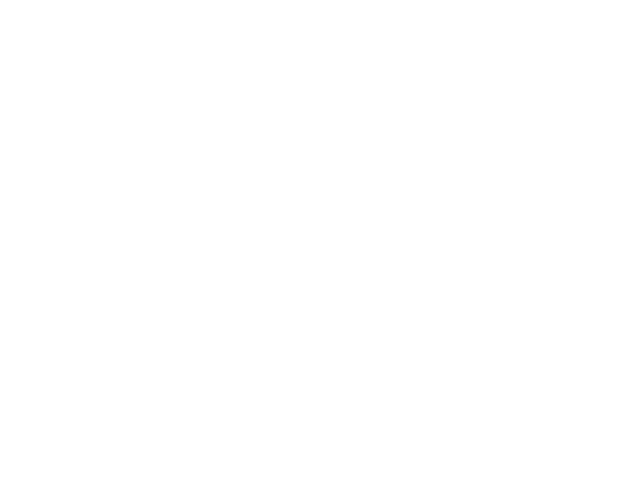

In [18]:
#Criando um Plot de visualizacao com o valor medio
#Justificativa: Visualizacao e interpretacao dos dados
%matplotlib notebook
labels = ['SAN. PELOTAS', 'TRI. JUST', 'CIA. SANEAMENTO', 'CIA. PROC. DE DADOS', 'BANCO DESEN.']
x = np.arange(len(labels))  
width = 0.25 
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_analise_grouped_5['VL_UNITARIO_HOMOLOGADO-mean'], 
                width, label = 'VL_UNITARIO_HOMOLOGADO-mean', color = 'mediumorchid')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis = 'both', which = 'major', labelsize = 6)
ax.set_ylabel('VL_UNITARIO_HOMOLOGADO-mean')
ax.legend()
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
fig.tight_layout()
plt.show()
plt.savefig('VL_UNITARIO_HOMOLOGADO-mean.png', dpi = 300)

---
###  _*Discussão da análise dos dados numéricos*_ 

A ideia inicial de agrupamento dos dados serviu para identificar os órgãos de maior influência em termos quantitativos, representados pelos gráficos acima. Observa-se, entre os 5 primeiros do ranking, uma linearidade mais contundente em termos de gastos. Identificando o padrão para o ano de 2017, diferentemente de 2016, que houve uma distorção quanto ao primeiro órgão com maior valor de licitação homologado. Ainda difere-se em termos de itens e de licitações os órgãos em virtude da peculiaridade da análise por item e não por montante final. A qual, pode variar, pois não necessariamente o maior valor homologado foi em termos quantitativos de um único ítem. Em suma também observa-se que em termos de quantitade de ítens, aprecem como principais formadores os alimentos e seus derivados.


Com a presente identificação, pode-se ter uma padronização da área de maior exigência por itens isolodamente. Mas não implica diretamente em ser o ítem mais citado, a ser verificado pela análise NLP.


---
### _*Trabalhando com os dados categoricos - DS_ITEM*_ 

 _O objetivo dessa seção é avaliar via NLP a ocorrência de palavras com maior frequência na coluna DS_ITEM. Justifica-se essa análise para identificar de fato ítens relevantes na identificação de padrões de ítens licitados.*_ 

 Com isso, o processamento conta com etapas de: Tokenização, Stopwords e criação de n-grams. 

 Para as etapas, algumas medidas foram necessárias para tratar os dados, como a retirada de acentução, acréscimo de stopwords e procedimento repetido de plotagem e análise dos uni-grams. 

---

In [19]:
#Utilizacao do dataframe já selecionado com as colunas: CD_ORGAO, DS_ITEM, VL_UNITARIO_HOMOLOGADO
df_analise

,CD_ORGAO,DS_ITEM,VL_UNITARIO_HOMOLOGADO
0,77200,óleo diesel comum,3.2300
1,77200,gasolina comum,4.2990
2,77200,óleo diesel S10,3.3390
3,77200,Recapagem de Pneu 1000x20 liso,543.0000
4,77200,"Recapagem de Pneu 1000x20 borrachudo, profundi...",583.0000
...,...,...,...
902705,78200,budesonida 50mcg spray nasal com 60 doses,10.4000
902706,78200,medroxiprogesterona (acetato) 150 mg,13.2600
902707,78200,captopril 25mg,0.0130
902708,78200,"ciprofloxacino 500mg comprimido fracionável, e...",0.4000


In [20]:
#Importando pacotes de processamento de linguagem natural NLP
import nltk
nltk.download('punkt') #token
nltk.download('stopwords')
nltk.download('wordnet')

#Importando os pacotes necessarios para particao e analise
#Em caso de separação dos dados, mas optou-se pela integridade, apesar do custo computacional
from sklearn.model_selection import train_test_split

#Processamento de texto e analise, diretamente do nltk
import re
from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

#Definindo o seed de execucao
seed = 123

#Definindo o Dataset de treino, apenas com a coluna de strings
#Justificativa: Criar um o dataset de interesse apenas com strings
X_train = df_analise['DS_ITEM']

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/viniciuspacheci/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/viniciuspacheci/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/viniciuspacheci/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
#Realizando o "join" ou uniao de todas as strings dispostas na coluna DS_OBJETO
train_string = " ".join(X_train.values)
print(f"**** Extracao da train_string ***** \n{train_string[:101]}", "/n")

**** Extracao da train_string ***** 
óleo diesel comum gasolina comum óleo diesel S10 Recapagem de Pneu 1000x20 liso Recapagem de Pneu 100 /n


In [22]:
#Etapa de remoção de acentuação

#Importacao do unicode
import unicodedata

#Criação de função para remoção de acentuação
def remove_acc(palavra):

    #Unicode normalize para transformação de equivalente na em latin
    nfkd = unicodedata.normalize('NFKD', palavra)
    palavraSemAcento = u"".join([c for c in nfkd if not unicodedata.combining(c)])

    #Retorno da palavra apenas com números, letras e espaço
    return re.sub('[^a-zA-Z0-9 \\\]', '', palavraSemAcento)

In [23]:
#Removendo a acentuação
#remove_acc(train_string)

#Por motivos computacioanis, decidiu-se não usar o atributo na presente análise

In [24]:
#Realizando o split da Colecao do documento, frequentemente chamada de "Corpus"
splits = train_string.split()
print(f"**** Extracao dos splits ***** \n{splits[:18]}\n")

**** Extracao dos splits ***** 
['óleo', 'diesel', 'comum', 'gasolina', 'comum', 'óleo', 'diesel', 'S10', 'Recapagem', 'de', 'Pneu', '1000x20', 'liso', 'Recapagem', 'de', 'Pneu', '1000x20', 'borrachudo,']



In [25]:
#Verificando o conjunto das strings
#A verificacao das variáel "train_string" em tela gera um esforço computacional
#adicional, logo, opta-se por apenas comentar.
#train_string

In [26]:
#Quantas strings há?
#Retornando os valores obtidos de strinds unificadas e valores unicos do conjunto
print(f"O numero de strings unificadas: {len(splits)}")
print(f"O numero de strings unicas: {len(set(splits))}")

O numero de strings unificadas: 8113409
O numero de strings unicas: 387139


In [27]:
#Encontrando as Strings com maior frequencia no DS_OBJETO
freq_splits = FreqDist(splits)
print(f"***** As 10 strings mais comumns no conjunto de dados DS_OBJETO: ***** /n {freq_splits.most_common(10)}", "/n")

***** As 10 strings mais comumns no conjunto de dados DS_OBJETO: ***** /n [('de', 369574), ('DE', 247097), ('com', 130912), ('-', 117301), ('e', 116386), ('COM', 76818), ('em', 71828), ('para', 61567), ('E', 60454), ('PARA', 44680)] /n


In [28]:
#Definindo strings "curtas" (short) com até 2 caracteres
#optou-se por 2 caracteres nesse caso, pois palavras curtas como: pneu
#podem ser alvos do estudo

short = set(i for i in splits if len(i)<2)
short = [(i, freq_splits[i]) for i in short]
short.sort(key = lambda x:x[1], reverse = True)
#short
#Opta-se também, pelo esforço computacional, nao imprimir na tela

#Observa-se especialmente múltiplos unitários como km, e conectivos (tokens)

In [29]:
#Definindo strings "longas" (long) com mais de 18 letras
#Considerar, palavras longas com mais de 20 letras,
#de acordo com norma culta (https://www.normaculta.com.br/palavras-grandes/)
#Critério de análise selecionado para 18 letras.

long = set(i for i in splits if len(i)>18)
long = [(i, freq_splits[i]) for i in long]
long.sort(key = lambda x:x[1], reverse = True)
#long

#Definicao de nao plotagem, pelos mesmos critérios anteriores

In [30]:
#Criando uma funcao (summarise) para identificar o percentual da ocorrencia de certas strings:
#Como por exemplo "pneu"

def summarise(pattern, strings, freq):
    """Funcao summarise encontra o padrao inserido"""
    #Encontrando os "matches"
    compiled_pattern = re.compile(pattern)
    matches = [i for i in strings if compiled_pattern.search(i)]
    
    #Volume e proporcao dos "matches"
    print("{} strings, que sao {: .2%} do total".format(len(matches), len(matches)/len(strings)))
    
    #Criacao de listas de tuplas com os "matches" e as frequencias determinadas
    output = [(i, freq[i]) for i in set(matches)]
    output.sort(key = lambda x:x[1], reverse = True)
    
    return output

In [31]:
#Verificando algumas frequencias --> pneu
#Para o upload do notebook no Github, optou-se por não exibir na tela o resultado da função
#summarise(r"pneu", splits, freq_splits)

In [32]:
#Verificando frequencias de números
#Para o upload do notebook no Github, optou-se por não exibir na tela o resultado da função
#summarise(r"\d", splits, freq_splits)

#Observa-se a forte presença de números, especialmente na descricao dos atributos
#dos itens comprados

In [33]:
#Verificando a combinacao de palavras com pontuacoes diversas
#Justifica-se essa analise uma vez que nao há padrao na escrita
#Justifica-se também pela grande variabilidade de tipologia de ítens
#Para o upload do notebook no Github, optou-se por não exibir na tela o resultado da função
#summarise(r"\w+[_!&/~'-)(<\|}{\[\]]\w+", splits, freq_splits)

---
##   Tokenizacao dos caracteres; 

  Necessária aplicacao de Tokenizacao para eliminar pontuacoes e afins; 

  Essencialmente para identificar quantos tokens existem e quantos tokens unicos existem; 

  Fonte: https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html; 

---

In [34]:
#Aplicando o processo de Tokenizacao (tokenizer)
tokeniser = RegexpTokenizer("[A-Za-z]+")
tokens = tokeniser.tokenize(train_string)
print(tokens[:20], "\n")

['leo', 'diesel', 'comum', 'gasolina', 'comum', 'leo', 'diesel', 'S', 'Recapagem', 'de', 'Pneu', 'x', 'liso', 'Recapagem', 'de', 'Pneu', 'x', 'borrachudo', 'profundidade', 'mm'] 



In [35]:
#Com isso, podemos responder as questoes relevantes
print(f"O numero de tokens: {len(tokens)}")
print(f"O numero de tokens unicos: {len(set(tokens))}")

O numero de tokens: 8433033
O numero de tokens unicos: 115565


In [36]:
#Contudo, o numero de tokens é relativamente alto, um processo de normalizacao
#deve ser aplicado para padronizar letras maiúsculas e minúsculas (lower and upper cases)
#Para isso, utiliza-se o processo de lemmatization (agrupamento de formas flexionadas)
lemmatiser = WordNetLemmatizer()
tokens_norm = [lemmatiser.lemmatize(t.lower(), "v") for t in tokens]
print(f"O numero de tokens unicos é de: {len(set(tokens_norm))}")

O numero de tokens unicos é de: 71731


Média de caracteres por token: 4.4985


<IPython.core.display.Javascript object>


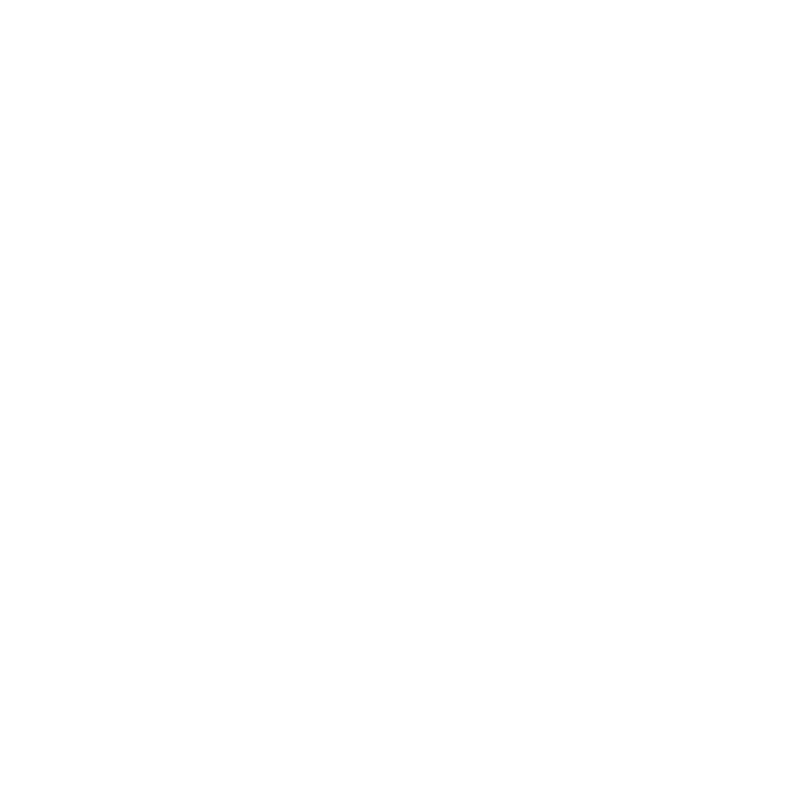

In [37]:
#Com isso, a analise decorre agora da analise dos tokens
#Analisando o "length" dos tokens e sua distribuicao

#Criacao de lista para o "length" de tokens
token_length = [len(t) for t in tokens]

#Numero médio de caracteres por token
print(f"Média de caracteres por token: {round(np.mean(token_length), 4)}")

#Plotando a distribuicao
%matplotlib notebook
plt.figure(figsize = (8, 8))
sns.countplot(y = token_length)
plt.title("Extensão dos caracteres dos Tokens", size = 18)
plt.savefig('Token-Length.png', dpi = 300)

---
##   Stopwords; 

  Identificacao de palavras que nao contribuem para o texto; 

  Por vezes sao conectivos e afins da linguagem; 

---

In [38]:
#Criacao e verificacao das stopwords em Portugues
stop_words = stopwords.words("portuguese")
print(f"Há {len(stop_words)} stopwords.\n")
print(stop_words)

Há 204 stopwords.

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem'

---
##   Processo de adição de stopwords

  a) O processo foi executado com as stopwords originais;

  b) Identificação de palavras que nao correspondiam a itens, logo deveriam ser excluidas

 c) O processo aqui está otimizado, adicionando as palavras requeridas

---

In [39]:
#Adicionando novas "stopwords" identificadas durante o processo de NLP
new_words = ['mm', 'kg', 'validade', 'exige', 'termo', 'refer', 'ncia',
            'meses', 'contar', 'data', 'entrega', 'dado', 'identifica', 'proced', 'ncia',
            'meses', 'partir', 'data', 'entrega', 'externamente', 'dado', 'identifica', 'proced',
            'nutricional', 'peso', 'fabricante', 'data', 'tulo','ingrediente', 'valor', 'nutricional',
            'cm', 'mg', 'tipo', 'tamanhos', 'unidades', 'qualidade', 'material', 'defeitos', 'ml',
            'possam', 'alterar', 'apar', 'produto', 'ingredientes', 'fabrica', 'nima', 'quantidade',
            'nima', 'destina', 'grau', 'quantidade', 'destina', 'grau', 'dever', 'ser', 'apresentada',
             'amostra', 'conforme', 'material', 'fornecimento', 'instala', 'registro', 'minist', 'rio', 'sa]',
             'nimo', 'ginas', 'cada', 'formato', 'cor', 'vel', 'cada', 'formato', 'livro', 'volume',
            'registro', 'minist', 'rio', 'agricultura', 'descart', 'vel', 'est', 'ril',
            'presta', 'servi', 'cobertura', 'seguro', 'caracter', 'sticas', 'cor', 'branca', 'servi',
            've', 'culo', 'dimes', 'es']
             
#Adicionando as novas palavras as stopwords existentest
stop_words.extend(new_words)
#Replotando as stopwords
stop_words

['de',
 'a',
 'o',
 'que',
 'e',
 'é',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera'

In [40]:
#Stopwords mais frequentes utilizadas
n_stopwords = len([t for t in tokens_norm if t in stop_words])
print(f"{n_stopwords} tokens são stopwords")
print(f"Isso corresponde a {round(100*n_stopwords/len(tokens_norm), 2)}%")

3040683 tokens são stopwords
Isso corresponde a 36.06%


---
##   n-gramas ou "n-grams"; 

  Uso de n-grams para identificacao do conjunto de palavras mais relevantes; 

  Objetivando encontra a área de interesse mais frequente requisitada; 

---

In [41]:
#Removendo as stopwords, para análise refinada dos n-grams
tokens_clean = [t for t in tokens_norm if t not in stop_words]
print(f"O número e tokens para análise dos n-grams é de: {len(tokens_clean)}")
print(f"Isso corresponde a redução de {round(100*len(tokens_clean)/len(tokens), 2)}% dos tokens originais")

O número e tokens para análise dos n-grams é de: 5392350
Isso corresponde a redução de 63.94% dos tokens originais


In [42]:
#Transforming X_train in DataFrame
X_train = pd.DataFrame(X_train)

In [43]:
#Com a remocao dos tokens, pode-se criar os n-grams: unigrams, bigrams, trigrams e fourgrams
#Com base na definicao das funcoes

def preprocess_text(text):
    """Pré-processamento do texto com tokens normalizados"""
    #Processo de "Tokenise"as palavras em modo alfabérico
    tokenizer = RegexpTokenizer(r'[A-Za-z]{2,}')
    tokens = tokenizer.tokenize(text)
    
    #Transformação em "lowercase" e processo de "lemmatise"
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token.lower(), pos = 'v') for token in tokens]
    
    #Removendo stopwords
    keywords = [lemma for lemma in lemmas if lemma not in stop_words]
    return keywords

def get_frequent_ngram(corpus, ngram, n = 20):
    """Encontrando os n-grams mais comuns com os Tokens normalizados"""
    #Pré-processamento de cada documento
    documents = [preprocess_text(document) for document in corpus]
    
    #Encontrando n-grams por documento
    n_grams = [list(ngrams(document, ngram)) for document in documents]
    
    #Encontrando a frequência dos n-grams
    n_grams_flattened = [item for sublist in n_grams for item in sublist]
    freq_dist = FreqDist(n_grams_flattened)
    top_freq = freq_dist.most_common(n)
    return pd.DataFrame(top_freq, columns = ['ngram', 'count'])

In [44]:
"""
Os plots dos n-grams não foram executados por motivos computacionais, com intuito de agilizar a execução do códio. Com isso, foram plotados em formato DataFrame.
"""


#Plotando uni-gram 
%matplotlib notebook
mapping = {1:"uni"}
plt.figure(figsize=(15,10))
sns.barplot(x = "count", y = "ngram",
data = get_frequent_ngram(X_train['DS_ITEM'], 1))
plt.title(f"Mais comum {mapping[1]}grams")
plt.show()
plt.savefig(f"Mais comum {mapping[1]}grams.png", dpi = 300)


#Percebe-se que sao características relativas aos itens

<IPython.core.display.Javascript object>

In [45]:
#Replotandon o one-gram, em formato df
data = get_frequent_ngram(X_train['DS_ITEM'], 1)
data

,ngram,count
0,"(embalagem,)",44521
1,"(tamanho,)",28771
2,"(papel,)",22404
3,"(pl,)",22047
4,"(caixa,)",21126
5,"(dio,)",17235
6,"(pneu,)",16330
7,"(gr,)",15990
8,"(stico,)",15662
9,"(pvc,)",15286


In [46]:
"""
#Plotando bi-gram 
%matplotlib notebook
mapping = {2:"bi"}
plt.figure(figsize=(15,10))
sns.barplot(x = "count", y = "ngram",
data = get_frequent_ngram(X_train['DS_ITEM'], 2))
plt.title(f"Mais comum {mapping[2]}grams")
plt.show()
plt.savefig(f"Mais comum {mapping[2]}grams.png", dpi = 600"
"""

'\n#Plotando bi-gram \n%matplotlib notebook\nmapping = {2:"bi"}\nplt.figure(figsize=(15,10))\nsns.barplot(x = "count", y = "ngram",\ndata = get_frequent_ngram(X_train[\'DS_ITEM\'], 2))\nplt.title(f"Mais comum {mapping[2]}grams")\nplt.show()\nplt.savefig(f"Mais comum {mapping[2]}grams.png", dpi = 600"\n'

In [47]:
#Replotandon o bi-grams, em formato df
data = get_frequent_ngram(X_train['DS_ITEM'], 2)
data

,ngram,count
0,"(pl, stico)",11232
1,"(pl, stica)",7715
2,"(tamanho, dio)",5204
3,"(di, metro)",4573
4,"(embalagem, pl)",4129
5,"(alum, nio)",3777
6,"(contrata, empresa)",3640
7,"(at, xico)",3244
8,"(munic, pio)",3052
9,"(farinha, trigo)",2953


In [48]:
"""
#Plotando tri-gram 
#Replotandon o tri-grams, em formato df
%matplotlib notebook
mapping = {3:"tri"}
plt.figure(figsize=(25,10))
sns.barplot(x = "count", y = "ngram",
data = get_frequent_ngram(X_train['DS_ITEM'], 3))
plt.title(f"Mais comum {mapping[3]}grams")
plt.show()
plt.savefig(f"Mais comum {mapping[3]}grams.png", dpi = 600"
"""

'\n#Plotando tri-gram \n#Replotandon o tri-grams, em formato df\n%matplotlib notebook\nmapping = {3:"tri"}\nplt.figure(figsize=(25,10))\nsns.barplot(x = "count", y = "ngram",\ndata = get_frequent_ngram(X_train[\'DS_ITEM\'], 3))\nplt.title(f"Mais comum {mapping[3]}grams")\nplt.show()\nplt.savefig(f"Mais comum {mapping[3]}grams.png", dpi = 600"\n'

In [49]:
data = get_frequent_ngram(X_train['DS_ITEM'], 3)
data

,ngram,count
0,"(embalagem, pl, stica)",3877
1,"(anexo, vi, edital)",1691
2,"(saco, pl, stico)",1479
3,"(embalagem, prim, ria)",1377
4,"(farinha, trigo, especial)",1192
5,"(caneta, esferogr, fica)",1172
6,"(contrata, empresa, especializada)",1158
7,"(pl, stica, transparente)",1129
8,"(papel, higi, nico)",1062
9,"(ferro, cido, lico)",1053


In [50]:
"""
#Plotando four-gram 
%matplotlib notebook
mapping = {4:"four"}
plt.figure(figsize=(33,10))
sns.barplot(x = "count", y = "ngram",
data = get_frequent_ngram(X_train['DS_ITEM'], 4))
plt.title(f"Mais comum {mapping[4]}grams")
plt.show()
plt.savefig(f"Mais comum {mapping[4]}grams.png", dpi = 600"
"""

'\n#Plotando four-gram \n%matplotlib notebook\nmapping = {4:"four"}\nplt.figure(figsize=(33,10))\nsns.barplot(x = "count", y = "ngram",\ndata = get_frequent_ngram(X_train[\'DS_ITEM\'], 4))\nplt.title(f"Mais comum {mapping[4]}grams")\nplt.show()\nplt.savefig(f"Mais comum {mapping[4]}grams.png", dpi = 600"\n'

In [51]:
#Replotando o four-grams, em formato df
data = get_frequent_ngram(X_train['DS_ITEM'], 4)
data

,ngram,count
0,"(enriquecida, ferro, cido, lico)",840
1,"(embalagem, pl, stica, transparente)",828
2,"(descri, item, anexo, edital)",641
3,"(indicar, marca, consumo, estimado)",582
4,"(origem, sica, mec, nica)",533
5,"(les, origem, sica, mec)",522
6,"(pl, stica, at, xica)",522
7,"(pl, stico, at, xico)",477
8,"(embalagem, pl, stica, at)",468
9,"(ref, indicar, marca, consumo)",461


In [52]:
"""
#Plotando five-gram 
%matplotlib notebook
mapping = {5:"five"}
plt.figure(figsize=(33,10))
sns.barplot(x = "count", y = "ngram",
data = get_frequent_ngram(X_train['DS_ITEM'], 5))
plt.title(f"Mais comum {mapping[5]}grams")
plt.show()
plt.savefig(f"Mais comum {mapping[5]}grams.png", dpi = 600"
"""

'\n#Plotando five-gram \n%matplotlib notebook\nmapping = {5:"five"}\nplt.figure(figsize=(33,10))\nsns.barplot(x = "count", y = "ngram",\ndata = get_frequent_ngram(X_train[\'DS_ITEM\'], 5))\nplt.title(f"Mais comum {mapping[5]}grams")\nplt.show()\nplt.savefig(f"Mais comum {mapping[5]}grams.png", dpi = 600"\n'

In [53]:
#Analisando o five-grams, em formato df
data = get_frequent_ngram(X_train['DS_ITEM'], 5)
data

,ngram,count
0,"(les, origem, sica, mec, nica)",521
1,"(ref, indicar, marca, consumo, estimado)",461
2,"(embalagem, pl, stica, at, xica)",447
3,"(embalagem, pl, stica, transparente, resistente)",429
4,"(trigo, enriquecida, ferro, cido, lico)",422
5,"(permita, suportar, manipula, transporte, cons...",352
6,"(suportar, manipula, transporte, conserva, condi)",338
7,"(farinha, trigo, enriquecida, ferro, cido)",335
8,"(manipula, transporte, conserva, condi, adequa...",333
9,"(transporte, conserva, condi, adequadas, consumo)",326


---
### _*Discussão da análise dos dados NLP*_ 

Através do processamento NLP dos dados textuais, percebeu-se, através do processo dividido em multi-etapas, a identificação de ítens como: farinha de trigo enriquecida com ferro como o principal item. Ainda, outros itens como: embalagem plástica resistente, estrutura de concreto armado e fraldas geriátricas, também foram denominadas como ítens prioritários.


Com a presente identificação, pode-se ter uma padronização da área de maior exigência por itens isolodamente. Mas não implica diretamente em ser o ítem mais citado, a ser verificado pela análise NLP.


---
##  _*DISCUSSÕES E CONCLUSÕES- Ano 2017 - itens.csv*_ 


De acordo com a análise exploratória submetida em duas etapas, para análise numérica e NLP, algumas conclusoes podem ser obtidas: 

a) Em relação à análise via VL_UNITATIO_HOMOLOGADO, ou seja, análise quantitativa, obeteve-se uma diferenciação em termos da distribuição em termos mais homogêneos dos 5 primeiros órgãos do ranking (5);

b) Em relação à análise NLP observou-se, para o presente ano a continuidade no elemento farinha de trigo enriquecida com ferro e ácido fólico; também identificou-se emabalagens plásticas como no ano anterior e caneta esferográfica. Também a existência de elementos do ramo da construçãao civil, como concreto, pilar, viga e armadura. 

c) A presente análise optou, por custos computacionais, não realizar a padronizaão da acentuação. Com isso, também foi possível analisar os dados em termos heterogêneos e mesmo assim o algorítmo convergiu para padronização de ocorrências;


e) Com isso, a análise exploratória inicial respondeu as perguntas devidas sobre órgãos com maior volume em termos de licitações, bem como identificação de áreas de interesse (através da análise da planilha "licitacoes") e identificação de padrões de itens de compra.

---